# Exercises in Classification I

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [6]:
adult_data = pd.read_csv('adult.csv')
adult_data['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

1. Clean the `income` variable such that it has only two values


In [7]:
adult_data['income'] = adult_data['income'].str.replace('.', '', regex=False)
adult_data['sex'] = adult_data['sex'].map({'Male' : 1, 'Female' : 0})
adult_data['income'] = adult_data['income'].map({'>50K' : 1, '<=50K' : 0})

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,1,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States,0


2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 

In [8]:
x_var = adult_data[['fnlwgt', 'age', 'education-num', 'sex']]
y_var = adult_data[['income']]

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var.values.ravel(), test_size=0.3, random_state=123)

In [9]:
def knnSweep(X, y, maxK):

    accuracy_row_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
        
    for k in range(2, maxK):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
            
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        accuracy_row_list.append({"k": k, "Training accuracy": accuracy_train, "Test accuracy": accuracy_test})

    return pd.DataFrame(accuracy_row_list)

In [10]:
acc_df = knnSweep(x_var, y_var.values.ravel(), 15)
acc_df

,k,Training accuracy,Test accuracy
0,2,0.853315,0.750836
1,3,0.845009,0.713847
2,4,0.810875,0.750495
3,5,0.805756,0.726950
4,6,0.790547,0.749949
5,7,0.786774,0.734252
6,8,0.780075,0.751450
7,9,0.777121,0.741964
8,10,0.773641,0.755818
9,11,0.773202,0.747424


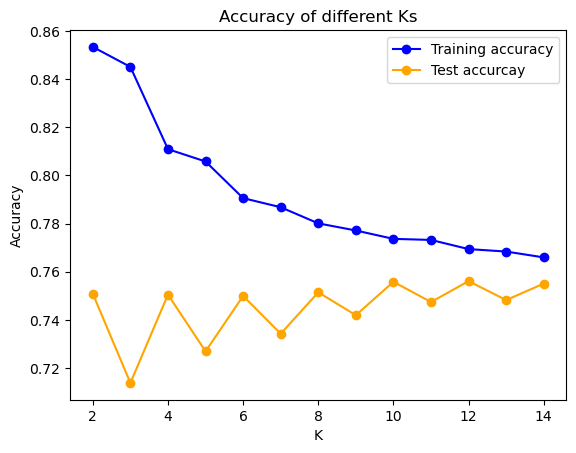

In [11]:
plt.plot(acc_df["k"], acc_df["Training accuracy"], label = 'Training accuracy', color='blue', marker='o', linestyle='solid')
plt.plot(acc_df["k"], acc_df["Test accuracy"], label = 'Test accurcay', color='orange', marker='o', linestyle='solid')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.

In [12]:
logit_model_sk = linear_model.LogisticRegression(max_iter=1000)
logit_model_sk.fit(X_train, y_train)

y_pred_train_log = logit_model_sk.predict(X_train)
y_pred_test_log = logit_model_sk.predict(X_test)

In [13]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [14]:
print('KNN Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_knn)))
print('KNN Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_knn)))
print('Log Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_log)))
print('LOG Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_log)))

KNN Train Accuracy: 0.7736406446517886

KNN Test Accuracy: 0.7558179212447963

Log Train Accuracy: 0.7959577641931616

LOG Test Accuracy: 0.8002456834777861



6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

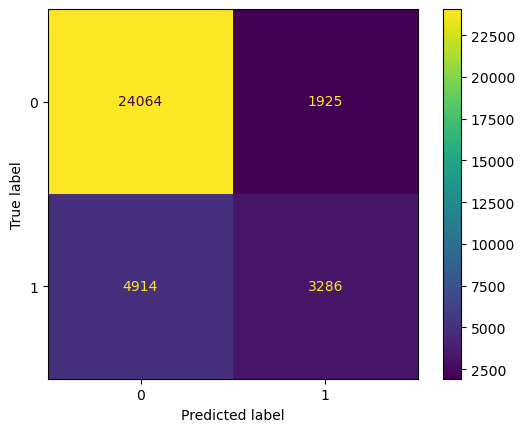

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X_train, y_train)

y_pred_train_dt = dtree.predict(X_train)
y_pred_test_dt = dtree.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train_dt)).plot()
plt.show()

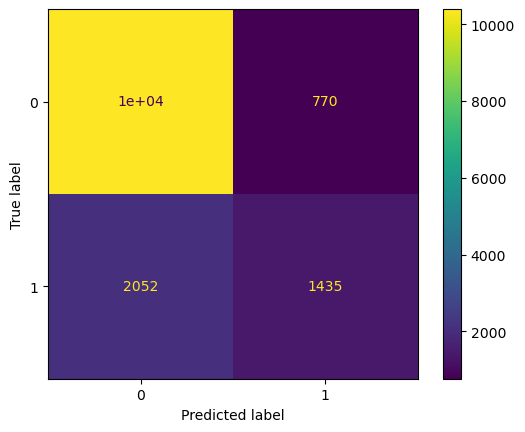

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_dt)).plot()
plt.show()

In [17]:
print('KNN Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_knn)))
print('KNN Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_knn)))
print('Log Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_log)))
print('LOG Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_log)))
print('DT Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_dt)))
print('DT Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_dt)))

KNN Train Accuracy: 0.7736406446517886

KNN Test Accuracy: 0.7558179212447963

Log Train Accuracy: 0.7959577641931616

LOG Test Accuracy: 0.8002456834777861

DT Train Accuracy: 0.7999649009915469

DT Test Accuracy: 0.8074114515798813



7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=3) 
rf_model.fit(X_train, y_train)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [19]:
print('KNN Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_knn)))
print('KNN Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_knn)))
print('Log Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_log)))
print('LOG Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_log)))
print('DT Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_dt)))
print('DT Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_dt)))
print('RF Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_rf)))
print('RF Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_rf)))

KNN Train Accuracy: 0.7736406446517886

KNN Test Accuracy: 0.7558179212447963

Log Train Accuracy: 0.7959577641931616

LOG Test Accuracy: 0.8002456834777861

DT Train Accuracy: 0.7999649009915469

DT Test Accuracy: 0.8074114515798813

RF Train Accuracy: 0.8016906022404867

RF Test Accuracy: 0.8089128506107964



8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [20]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

In [21]:
print('KNN Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_knn)))
print('KNN Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_knn)))
print('Log Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_log)))
print('LOG Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_log)))
print('DT Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_dt)))
print('DT Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_dt)))
print('RF Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_rf)))
print('RF Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_rf)))
print('XGB Train Accuracy: {}\r\n'.format(accuracy_score(y_train, y_pred_train_xgb)))
print('XGB Test Accuracy: {}\r\n'.format(accuracy_score(y_test, y_pred_test_xgb)))

KNN Train Accuracy: 0.7736406446517886

KNN Test Accuracy: 0.7558179212447963

Log Train Accuracy: 0.7959577641931616

LOG Test Accuracy: 0.8002456834777861

DT Train Accuracy: 0.7999649009915469

DT Test Accuracy: 0.8074114515798813

RF Train Accuracy: 0.8016906022404867

RF Test Accuracy: 0.8089128506107964

XGB Train Accuracy: 0.8263769048524379

XGB Test Accuracy: 0.799699720193817

